In [2]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import math
import random

## Step 1: Import Data 

In [2]:
# load csv file and set the index column by 0
df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)
df.head(20)

C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_5040\1972288972.py:2: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50.0,37.780526,-122.390288,453.0,37.777934,-122.396973,12424.0
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285.0,37.783521,-122.431158,74.0,37.776435,-122.426244,1718.0
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10.0,37.795393,-122.40477,399.0,37.802636,-122.436289,608.0
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106.0,37.763242,-122.430675,72.0,37.772406,-122.43565,551642.0
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80.0,37.775235,-122.397437,50.0,37.780526,-122.390288,1103.0
5,2019-04-17 19:39:05,2019-04-17 19:49:26,100.0,37.7671,-122.410662,74.0,37.776435,-122.426244,1473.0
6,2019-02-26 08:11:01,2019-02-26 08:22:58,67.0,37.776639,-122.395526,8.0,37.799953,-122.398525,4984.0
7,2019-02-02 09:23:15,2019-02-02 09:34:20,44.0,37.781074,-122.411738,55.0,37.777053,-122.429558,2666.0
8,2019-05-07 12:08:01,2019-05-07 12:12:00,9.0,37.798572,-122.400869,6.0,37.80477,-122.403234,1961.0
9,2019-09-04 21:58:19,2019-09-04 22:09:07,86.0,37.769305,-122.426826,39.0,37.778999,-122.436861,9717.0


In [3]:
# take a look at the data types and general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2507003 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 191.3+ MB
None
       start_time end_time  start_station_id  start_station_lat   
count     2507003  2507003         2426269.0       2.507003e+06  \
unique    2304544  2303004             867.0       7.712800e+04   
top       Failure  Failure              58.0       3.777662e+01   
freq           10       10           34467.0       3.446700e+04   

        start_station_lon  end_station_id  end_station_lat  end_station_lon   
count        2.507003e+06       2424101.0     2.507003e+06     2.507003e+06  \
unique     

We can see that the data types are not specified which makes it hard to work with. After inspecting the dataset, there are rows containing "Failure" so we want to remove all of these. 

In [4]:
# create a new data frame that containts all failure rows from dft
rent_failure = df["start_time"].str.contains("Failure")
data_failure = df[rent_failure]
data_failure

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
381556,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
485428,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
621119,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
713198,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1150787,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1558857,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1676023,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1697405,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1999499,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
2249494,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [5]:
# remove all rows that match failure rows
df = df.drop(data_failure.index, axis=0)

## Step 2: Transform Data

Now we have to convert every feature to the correct data types in order to to make calculations and analysis.

In [6]:
df["bike_id"]= pd.to_numeric(df["bike_id"], errors='coerce')
df["bike_id"]= df["bike_id"].astype('Int64')
df["start_station_lat"]= pd.to_numeric(df["start_station_lat"], errors='coerce')
df["start_station_lon"]=pd.to_numeric(df["start_station_lon"], errors='coerce')
df["end_station_lat"]=pd.to_numeric(df["end_station_lat"], errors='coerce')
df["end_station_lon"]=pd.to_numeric(df["end_station_lon"], errors='coerce')
df["start_station_id"] =pd.to_numeric(df["start_station_id"], errors='coerce')
df["start_station_id"]= df["start_station_id"].astype("Int64")
df["end_station_id"] =pd.to_numeric(df["end_station_id"], errors='coerce')
df["end_station_id"]= df["end_station_id"].astype("Int64")
df['start_station_lat'] = df['start_station_lat'].round(5)
df['start_station_lon'] = df['start_station_lon'].round(5)
df['end_station_lat'] = df['end_station_lat'].round(5)
df['end_station_lon'] = df['end_station_lon'].round(5)

df["start_time"]= pd.to_datetime(df["start_time"],format ='%Y-%m-%d %H:%M:%S')
df["end_time"]= pd.to_datetime(df["end_time"],format ='%Y-%m-%d %H:%M:%S')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2506993 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   Int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     Int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            Int64         
dtypes: Int64(3), datetime64[ns](2), float64(4)
memory usage: 198.4 MB
None


In [7]:
# After transforming the data we check if there are any non-defined values.
df.isna().sum()

start_time               0
end_time                 0
start_station_id     80734
start_station_lat        0
start_station_lon        0
end_station_id       82902
end_station_lat          0
end_station_lon          0
bike_id                  1
dtype: int64

## Step 3: Handle missing and incorrect values

Firstly, we noticed that there are entries which have invalid start or end time (not in 2019). Since the amount of it is less than 5%, we can remove these.

In [8]:
# drop some rows with start_time in 2013
df.drop(df[(df['start_time'].dt.year < 2018) | (df['start_time'].dt.year > 2020)].index, inplace=True)

Secondly, there are missing values in <b>start_station_id</b> and <b>end_station_id</b> column. We tried different approaches to handle these values:
- Using <b>k-means clustering algorithm</b> to assign an ID to the given longtitudes and latitudes.

- <b>Dropping</b> all rows with missing values.

The cost of performing the first method was higher than the latter and the amount of missing values take up less than 5%, so we decided to opt for the second approach.

In [9]:
df.drop(df[df['start_station_id'].isnull() | df['end_station_id'].isnull()].index, inplace = True)
#drop rows where start_time start after end_time
df.drop(df[df["start_time"] > df["end_time"]].index, inplace = True)

In [10]:
df_dup = df[['start_station_id', 'start_station_lat', 'start_station_lon']].copy()
start_station_dup = df_dup.groupby(['start_station_id','start_station_lat', 'start_station_lon']).size()
start_station_dup = start_station_dup.to_frame(name = 'size').reset_index()
start_station_dup.drop_duplicates(inplace=True)
start_station_dup.drop_duplicates(subset = "start_station_id", inplace = True)


In [11]:
end_station_dup = df[['end_station_id', 'end_station_lat', 'end_station_lon']].copy()
end_station_dup = end_station_dup.groupby(['end_station_id','end_station_lat', 'end_station_lon']).size()
end_station_dup = end_station_dup.to_frame(name = 'size').reset_index()
end_station_dup.drop_duplicates(inplace=True)
end_station_dup.drop_duplicates(subset = "end_station_id", inplace = True)


In [12]:
df_new = pd.merge(df, start_station_dup, on = 'start_station_id', how = 'left')


In [13]:
df_new = pd.merge(df_new, end_station_dup, on = 'end_station_id', how = 'left')
df_new


,start_time,end_time,start_station_id,start_station_lat_x,start_station_lon_x,end_station_id,end_station_lat_x,end_station_lon_x,bike_id,start_station_lat_y,start_station_lon_y,size_x,end_station_lat_y,end_station_lon_y,size_y
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50,37.78053,-122.39029,453,37.77793,-122.39697,12424,37.78053,-122.39029,24280,37.77793,-122.39697,2190
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285,37.78352,-122.43116,74,37.77643,-122.42624,1718,37.78352,-122.43116,8938,37.77643,-122.42624,12247
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10,37.79539,-122.40477,399,37.80264,-122.43629,608,37.79539,-122.40477,9465,37.80264,-122.43629,6569
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106,37.76324,-122.43067,72,37.77241,-122.43565,551642,37.76324,-122.43067,4184,37.77241,-122.43565,5319
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80,37.77523,-122.39744,50,37.78053,-122.39029,1103,37.77523,-122.39744,15475,37.78053,-122.39029,25535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407243,2019-04-12 19:11:48,2019-04-12 19:17:34,109,37.76332,-122.42190,381,37.75824,-122.42609,6118,37.76332,-122.42190,12598,37.75824,-122.42609,2073
2407244,2019-07-16 19:02:32,2019-07-16 19:06:54,58,37.77662,-122.41738,5,37.78390,-122.40844,1479,37.77662,-122.41738,44769,37.78390,-122.40844,31407
2407245,2019-05-29 16:03:26,2019-05-29 16:09:25,23,37.79146,-122.39103,15,37.79539,-122.39420,1742,37.79146,-122.39103,19128,37.79539,-122.39420,47925
2407246,2019-08-19 08:32:17,2019-08-19 08:41:26,23,37.79146,-122.39103,364,37.77200,-122.38997,10107,37.79146,-122.39103,19128,37.77200,-122.38997,10183


In [14]:
df_new.drop(['start_station_lat_x',	'start_station_lon_x','end_station_lat_x','end_station_lon_x','size_x','size_y'],axis= 1,inplace=True)
df_new.rename(columns={'start_station_lat_y':'start_station_lat','start_station_lon_y':'start_station_lon','end_station_lat_y': 'end_station_lat','end_station_lon_y':'end_station_lon'},inplace=True)
new_column_order = ['start_time','end_time','start_station_id','start_station_lat',	'start_station_lon','end_station_id','end_station_lat','end_station_lon','bike_id']
df_new= df_new[new_column_order]



In [15]:
coords = start_station_dup[['start_station_lat', 'start_station_lon']]

lat = coords.start_station_lat.tolist()
lon = coords.start_station_lon.tolist()
point_list = list(zip(lat,lon))
map = folium.Map(point_list[0], zoom_start =12, control_scale = True)

for p in point_list:
    folium.Marker(location = p, popup = str(p[0]) + str(p[1])).add_to(map)

map

In [16]:
# the random station in new york
specific_lat = 39.89257
specific_lon = -75.17371

matching_stations = df_new[(df_new['start_station_lat'] == specific_lat) & (df_new['start_station_lon'] == specific_lon)]
df_new.drop(matching_stations.index,inplace= True)


# station 420 with lat and lon =0.0
station_420 =df_new[df_new.start_station_id==420]
station_420
df_new.drop(station_420.index,inplace= True)


C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_5040\3543747007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(matching_stations.index,inplace= True)
C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_5040\3543747007.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(station_420.index,inplace= True)


In [17]:
df.to_csv('baywheels_2019_cleaned')

We are interested in calculating the <b> idle time of each station </b> at a <b>particular moment</b> in the day. The idle time is defined by the period of time, starting from when <b>a bike is returned</b> to the station to when <b>any other bike is rented </b> from that station.
Idle time is important for operation management because in these periods the station (resource) is fully available/capable of working but cannot be productive.

In [18]:
start_stations =df_new.loc[:,['start_time', 'start_station_id', 'bike_id']]
start_stations["rented"] = 1
start_stations.rename(columns = {"start_time": "timestamp", 'start_station_id': "station_id"}, inplace=True)

In [19]:
end_stations =df_new.loc[:,['end_time', 'end_station_id', 'bike_id']]
end_stations["rented"] = 0
end_stations.rename(columns={"end_time": "timestamp", 'end_station_id': "station_id"}, inplace=True)

In [20]:
df_merged = pd.concat([start_stations, end_stations], axis = 0)
df_merged = df_merged.sort_values(by = ["station_id", "timestamp"])
df_merged['idle_time'] = pd.Timedelta(0)
df_merged

,timestamp,station_id,bike_id,rented,idle_time
1292373,2019-01-01 01:05:01,3,5426,0,0 days
65397,2019-01-01 01:11:19,3,5481,1,0 days
159799,2019-01-01 01:23:27,3,5216,1,0 days
1518196,2019-01-01 01:40:07,3,5426,1,0 days
397351,2019-01-01 05:03:40,3,5191,1,0 days
...,...,...,...,...,...
1209120,2019-12-30 14:29:13,498,10962,0,0 days
1097765,2019-12-30 14:29:36,498,10962,1,0 days
1097765,2019-12-30 14:36:08,498,10962,0,0 days
1948370,2019-12-31 11:29:00,498,10962,1,0 days


We define a function that calculates idle time with the help of a nested loop inside the dataframe

In [21]:


def idle_cal(df):
    
    df = df.groupby('station_id')
    results = []  # List to store the modified groups
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
    
        group_data['prev_row'] = group_data.groupby("station_id")['timestamp'].shift(1)
        for i, row in group_data.iterrows():
            if i != 0:
                if row['rented'] == 1:
                    idle_time = pd.Timedelta(0)
                    #print('idle at i ', i , ':', idle_time)
                    j = i - 1 
                    while j>=1 and group_data.at[j,'rented'] == 0:
                        idle_time = group_data.at[i,'timestamp'] -  group_data.at[j,'timestamp']
                        group_data.at[j,'idle_time'] = idle_time
                        #print('idle at j ', j , ':',  idle_time)
                        j -= 1
                    
        results.append(group_data)

    modified_df = (pd.concat(results, ignore_index=True))
    df = pd.DataFrame(modified_df)
    return df
    
                    
        

              


In [22]:
df_merged = idle_cal(df_merged)
df_merged.head(100)

,timestamp,station_id,bike_id,rented,idle_time,prev_row
0,2019-01-01 01:05:01,3,5426,0,0 days,NaT
1,2019-01-01 01:11:19,3,5481,1,0 days,2019-01-01 01:05:01
2,2019-01-01 01:23:27,3,5216,1,0 days,2019-01-01 01:11:19
3,2019-01-01 01:40:07,3,5426,1,0 days,2019-01-01 01:23:27
4,2019-01-01 05:03:40,3,5191,1,0 days,2019-01-01 01:40:07
...,...,...,...,...,...,...
95,2019-01-01 17:59:20,3,4706,1,0 days,2019-01-01 17:56:43
96,2019-01-01 17:59:45,3,4372,1,0 days,2019-01-01 17:59:20
97,2019-01-01 18:01:51,3,5235,1,0 days,2019-01-01 17:59:45
98,2019-01-01 18:20:51,3,5105,1,0 days,2019-01-01 18:01:51


In [23]:
df_merged.drop('prev_row',axis=1, inplace= True)

In [24]:
df_merged.to_csv('idle_time_calculated')  

In [3]:
df_w_idle_time = pd.read_csv("idle_time_calculated")

In [4]:
df_w_idle_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4814490 entries, 0 to 4814489
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   timestamp   object
 2   station_id  int64 
 3   bike_id     int64 
 4   rented      int64 
 5   idle_time   object
dtypes: int64(4), object(2)
memory usage: 220.4+ MB


In [4]:
df_w_idle_time['timestamp']= pd.to_datetime(df_w_idle_time['timestamp'],format ='%Y-%m-%d %H:%M:%S')

In [5]:

df_w_idle_time['sum_idle_time']= pd.Timedelta(0)
df_w_idle_time['idle_mode_count']= 0
df_w_idle_time['month']= df_w_idle_time['timestamp'].dt.month

In [6]:
df_w_idle_time['day']= df_w_idle_time['timestamp'].dt.day
df_w_idle_time['hour']= df_w_idle_time['timestamp'].dt.hour


In [9]:
df_w_idle_time

,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,sum_idle_time,idle_mode_count,month,day,hour,day_of_week
0,0,2019-01-01 01:05:01,3,5426,0,0 days 00:00:00,0 days,0,1,1,1,1
1,1,2019-01-01 01:11:19,3,5481,1,0 days 00:00:00,0 days,0,1,1,1,1
2,2,2019-01-01 01:23:27,3,5216,1,0 days 00:00:00,0 days,0,1,1,1,1
3,3,2019-01-01 01:40:07,3,5426,1,0 days 00:00:00,0 days,0,1,1,1,1
4,4,2019-01-01 05:03:40,3,5191,1,0 days 00:00:00,0 days,0,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4814485,4814485,2019-12-30 14:29:13,498,10962,0,0 days 00:00:23,0 days,0,12,30,14,0
4814486,4814486,2019-12-30 14:29:36,498,10962,1,0 days 00:00:00,0 days,0,12,30,14,0
4814487,4814487,2019-12-30 14:36:08,498,10962,0,0 days 20:52:52,0 days,0,12,30,14,0
4814488,4814488,2019-12-31 11:29:00,498,10962,1,0 days 00:00:00,0 days,0,12,31,11,1


In [10]:
def sum_idle_cal(df):
    
    df = df.groupby('station_id')
    results = {}  # dict to store the modified groups
    
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
        sum_idle_time= pd.Timedelta(0)
        idle_mode_count = 0
    
        for i, row in group_data.iterrows():
            if i != 0:
                j = i - 1
                
                if row['rented']==0 and group_data.at[j,'rented'] == 1:
                    sum_idle_time += group_data.at[j,'sum_idle_time']+ group_data.at[i,'idle_time']
                    idle_mode_count +=1
                else:
                    sum_idle_time += group_data.at[j,'sum_idle_time']
                    
            else:
                sum_idle_time+= group_data.at[i,'idle_time']
                
                idle_mode_count+= 1
    
        
        results[str(group_name)] = [sum_idle_time, idle_mode_count]

    return results

In [11]:
def monthly_idle_sum(month):
    df = df_w_idle_time[df_w_idle_time['month'] == month]
    idle_in_month = sum_idle_cal(df)
    df = pd.DataFrame(columns= ["station_id", "idle_sum", "idle_count"])
    df["station_id"] = idle_in_month.keys()
    modified_values = list(zip(*idle_in_month.values()))
    df["idle_sum"] = modified_values[0]
    df["idle_count"] = modified_values[1]
    df["idle_avg"] = (df["idle_sum"]/ df["idle_count"]).dt.round('1s')
    df['month']= month
    return df

In [12]:
#Do not run this
# jan= monthly_idle_sum(1)
# feb= monthly_idle_sum(2)
# mar= monthly_idle_sum(3)
# apr= monthly_idle_sum(4)
# may= monthly_idle_sum(5)
# jun= monthly_idle_sum(6)
# jul= monthly_idle_sum(7)
# aug= monthly_idle_sum(8)
# sep= monthly_idle_sum(9)
# oct= monthly_idle_sum(10)
# nov= monthly_idle_sum(11)
# dec= monthly_idle_sum(12)

In [13]:
# Do not run this
# monthly_df_summary= pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], axis = 0)
# monthly_df_summary['station_id']=pd.to_numeric(monthly_df_summary['station_id'])
# monthly_df_summary= monthly_df_summary.sort_values(['month','station_id'])
# monthly_df_summary


In [14]:
# monthly_df_summary.to_csv("monthly sum and average per station")

In [7]:
df_w_idle_time_copy = df_w_idle_time.copy()
df_w_idle_time_copy['idle_time'] = pd.to_timedelta(df_w_idle_time['idle_time']).dt.total_seconds()/60
# print(df_w_idle_time_copy['idle_time'])

In [16]:
#dont run
# max_idle_time = df_w_idle_time_copy['idle_time'].max()
# print(max_idle_time)

# max_station = df_w_idle_time_copy[round(df_w_idle_time_copy['idle_time']) == round(max_idle_time)]
# print(max_station)

In [8]:
hour = df_w_idle_time_copy[df_w_idle_time_copy["rented"] == 0]["hour"]
idle_time = df_w_idle_time_copy[df_w_idle_time_copy["rented"] == 0]["idle_time"]
# idle_time = [round(x) for x in idle_time]

In [9]:
avg_values = df_w_idle_time_copy[(df_w_idle_time_copy["rented"] == 0) & (df_w_idle_time_copy["idle_time"] > 0.0)].groupby('hour')['idle_time'].mean()
print(avg_values)

hour
0     358.193809
1     330.618529
2     333.821144
3     265.824640
4     193.959576
5     116.505993
6      67.477305
7      42.193631
8      36.835221
9      44.474508
10     62.722174
11     69.985569
12     69.045411
13     76.809550
14     73.433805
15     72.527267
16     62.244171
17     63.918300
18     90.953594
19    132.605991
20    183.558893
21    240.336702
22    295.538146
23    335.532310
Name: idle_time, dtype: float64


## Correlation Idle time - Hours of a day

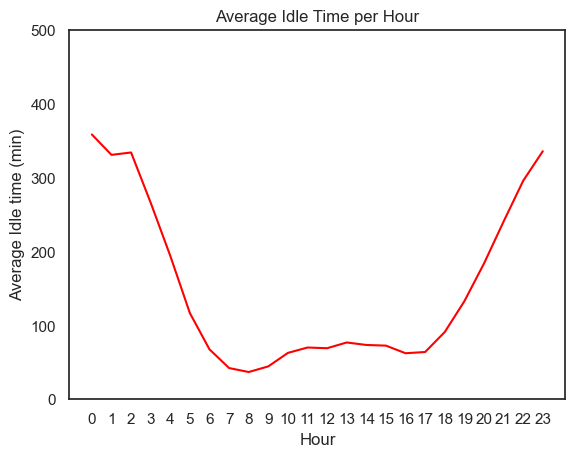

<Figure size 800x600 with 0 Axes>

In [10]:
plt.xlabel("Hour")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Hour")
x_values = range(0,24,1) 
plt.plot(x_values,avg_values, color = "red") 
plt.ylim(0,500)
plt.xticks(range(0, 24, 1))
plt.figure(figsize = (8,6))
plt.show()

Text(0, 0.5, 'Idle time (min)')

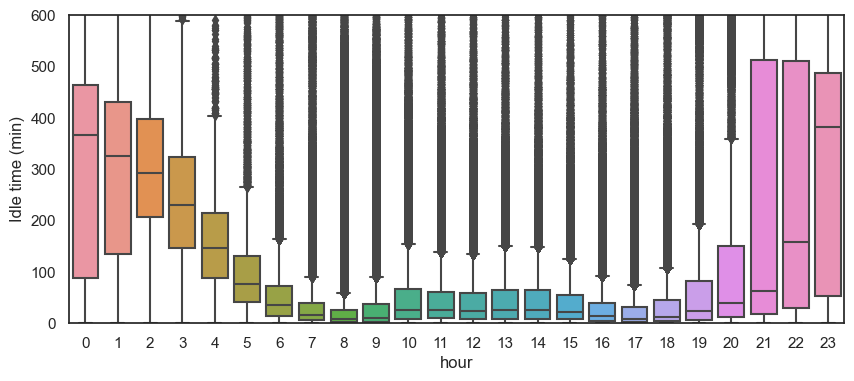

In [11]:
fig,ax = plt.subplots(figsize=(10,4)) 
sns.boxplot(x=hour, y= idle_time)
plt.ylim(0,600)
plt.ylabel("Idle time (min)")